In [ ]:
## Observations and Insights 

1. The study had near identical number of male and female mice.

2. The correlation between mouse weight, and average tumor volume is 0.84, which is a strong positive correlation. When the mouse weight increases, the average tumore volume also increases.

3. The regression analysis helped to understand how much the average tumor volume will change when weight of mice change. The r-squared value is 0.70, which means 70% the model fit the data, which is good to predict the data from the model.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(study_results, mouse_metadata, on ="Mouse ID", how="left")

# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(combine_data["Mouse ID"].unique())
mice_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combine_data[combine_data.duplicated(["Mouse ID", "Timepoint"])]

duplicate_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicates = combine_data[combine_data.duplicated(["Mouse ID"])]

all_duplicates.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_duplicates = all_duplicates.drop_duplicates("Mouse ID").reset_index()

clean_duplicates.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,137,g989,0,45.000000,0,Propriva,Female,21,26
1,250,a275,5,46.795257,0,Ceftamin,Female,20,28
2,251,w575,5,48.913860,1,Zoniferol,Female,16,28
3,252,x822,5,45.671104,1,Ceftamin,Male,3,29
4,253,l509,5,45.851193,0,Capomulin,Male,17,21


In [6]:
# Checking the number of mice in the clean DataFrame.
count_check = clean_duplicates["Mouse ID"].count()
count_check

237

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = clean_duplicates.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = clean_duplicates.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var = clean_duplicates.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std = clean_duplicates.groupby (["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = clean_duplicates.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_data = pd.DataFrame({"Mean": mean, "Median":median, "Variance":var, "Std Dev":std, "SEM":sem})
summary_data.round(2)




,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,44.27,45.60,5.03,2.24,0.45
Ceftamin,46.50,46.37,0.57,0.75,0.16
Infubinol,46.54,46.87,5.69,2.39,0.48
Ketapril,47.39,47.06,1.61,1.27,0.26
Naftisol,46.80,46.62,0.94,0.97,0.20
Placebo,47.13,46.99,1.14,1.07,0.22
Propriva,47.08,46.85,1.48,1.22,0.25
Ramicane,43.94,45.52,5.83,2.41,0.48
Stelasyn,47.47,47.05,1.49,1.22,0.25


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_duplicates.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']).round(2)
# This method produces everything in a single groupby function


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,44.27,45.60,5.03,2.24,0.45
Ceftamin,46.50,46.37,0.57,0.75,0.16
Infubinol,46.54,46.87,5.69,2.39,0.48
Ketapril,47.39,47.06,1.61,1.27,0.26
Naftisol,46.80,46.62,0.94,0.97,0.20
Placebo,47.13,46.99,1.14,1.07,0.22
Propriva,47.08,46.85,1.48,1.22,0.25
Ramicane,43.94,45.52,5.83,2.41,0.48
Stelasyn,47.47,47.05,1.49,1.22,0.25


## Bar and Pie Charts

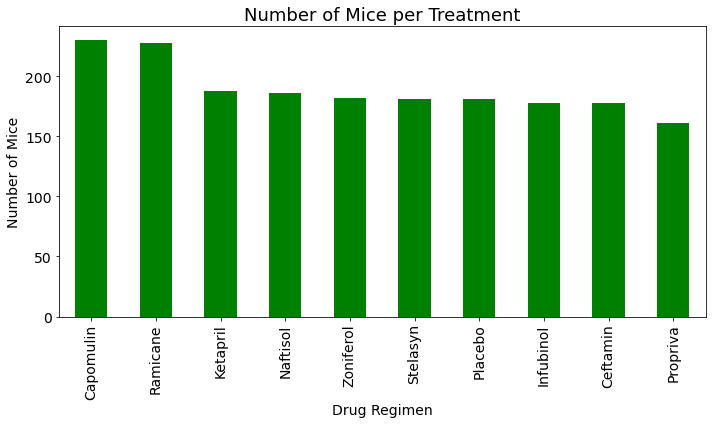

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count_mice_per_treatment = combine_data["Drug Regimen"].value_counts()

plot_pandas = count_mice_per_treatment.plot.bar(figsize=(10,6), color='green', fontsize=14,)
count_mice_per_treatment
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment", fontsize=18)


plt.savefig("Mice_per_treatment", bbox_inches = "tight")
plt.tight_layout()
plt.savefig('bar_chart1')
plt.show()

count_mice_per_treatment


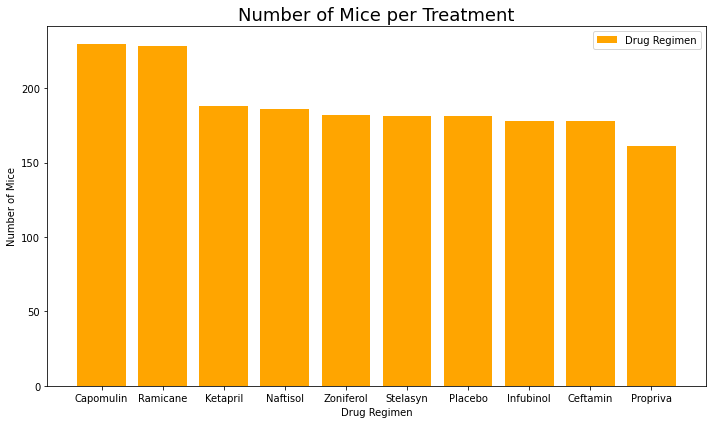

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

counts = combine_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(counts.index.values,counts.values, color = "orange") 

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment", fontsize = 18)

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")
plt.tight_layout()
plt.savefig('bar_chart2')

plt.show()



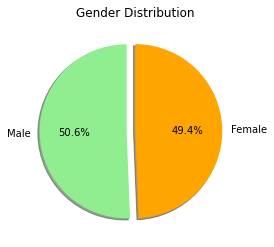

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#clean_duplicates = mouse_metadata[mouse_metadata["Mouse ID"].isin(duplicate_mouse) == False]
gender = clean_duplicates['Sex'].value_counts()
sizes = gender.values
labels = gender.values
gender.plot(kind="pie", colors = ['lightgreen', 'orange'], explode=(0.1,0), autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Gender Distribution")
plt.ylabel(" ")
plt.savefig('pie_chart1')
plt.show()

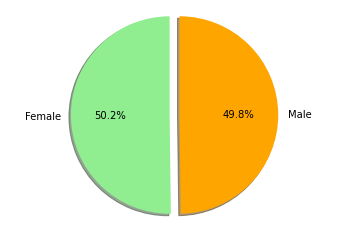

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
sizes = [50.2, 49.8]
colors = ['lightgreen', 'orange']
explode = (0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal");

plt.savefig('pie_chart2')





## Quartiles, Outliers and Boxplots

In [13]:
capomulin_df = combine_data.loc[combine_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = combine_data.loc[combine_data["Drug Regimen"] == "Ramicane",:]
infubinol_df = combine_data.loc[combine_data["Drug Regimen"] == "Infubinol",:]
ceftamin_df = combine_data.loc[combine_data["Drug Regimen"] == "Ceftamin",:]
capomulin_df.head()

 
#last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

#last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
#for drug in drug_list

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#drugs = combine_data[combine_data["Drug Regimen"].isin(drug_list)]
#drugs.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [14]:

capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, combine_data, on=("Mouse ID", "Timepoint"),how="left")
capomulin_merge.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint 
# Locate the rows which contain mice on each drug and get the tumor volumes
 # add subset    
 # # Determine outliers using upper and lower bounds
    
tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")


Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [16]:
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, combine_data, on=("Mouse ID", "Timepoint"),how="left")
ramicane_merge.head(10)
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

#treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#treatments = combine_data[combine_data["Drug Regimen"].isin(treatments_list)]
#treatments.head()


#last_timepoint = treatments.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

#last_timepoint = last_timepoint.stack(level=0).unstack(level=0)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20
5,c758,45,33.397653,1,Ramicane,Male,9,17
6,d251,45,37.311236,2,Ramicane,Female,8,19
7,e662,45,40.659006,2,Ramicane,Male,8,24
8,g791,45,29.128472,1,Ramicane,Male,11,16
9,i177,45,33.562402,3,Ramicane,Male,10,18


In [17]:
#Ramicane
tumors2 = ramicane_merge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [18]:
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, combine_data, on=("Mouse ID", "Timepoint"),how="left")
infubinol_merge.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28
5,c326,5,36.321346,0,Infubinol,Female,18,25
6,c895,30,60.969711,2,Infubinol,Female,7,29
7,e476,45,62.435404,1,Infubinol,Male,23,26
8,f345,45,60.918767,1,Infubinol,Male,23,26
9,i386,40,67.289621,4,Infubinol,Female,23,29


In [19]:
#Infubinol
tumors3 = infubinol_merge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [20]:
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, combine_data, on=("Mouse ID", "Timepoint"),how="left")
ceftamin_merge.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25
5,h531,5,47.784682,0,Ceftamin,Male,5,27
6,j296,45,61.849023,3,Ceftamin,Female,24,30
7,k210,45,68.923185,3,Ceftamin,Male,15,28
8,l471,45,67.748662,1,Ceftamin,Female,7,28
9,l490,30,57.918381,3,Ceftamin,Male,24,26


In [21]:
#Ceftamin
tumors4 = ceftamin_merge["Tumor Volume (mm3)"]

quartiles4 = tumors.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


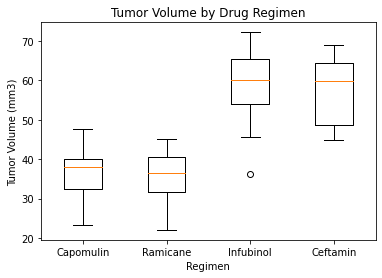

In [22]:

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume by Drug Regimen")
ax1.set_xlabel("Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")

ax1.boxplot(data_to_plot, labels=["Capomulin", "Ramicane","Infubinol", "Ceftamin"])

plt.savefig('boxplot')
plt.show()


## Line and Scatter Plots

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
forline_df = capomulin_df.loc[capomulin_df["Mouse ID"] =="b128",:]
forline_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22


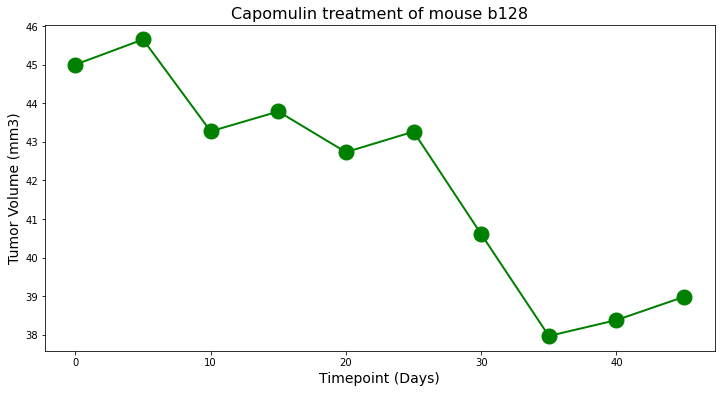

In [24]:
x_axis = forline_df["Timepoint"]
tumor_volume = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.title('Capomulin treatment of mouse b128', fontsize =16)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=15, marker="o",color="green", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)', fontsize =14)

plt.savefig('linechart')
plt.show()

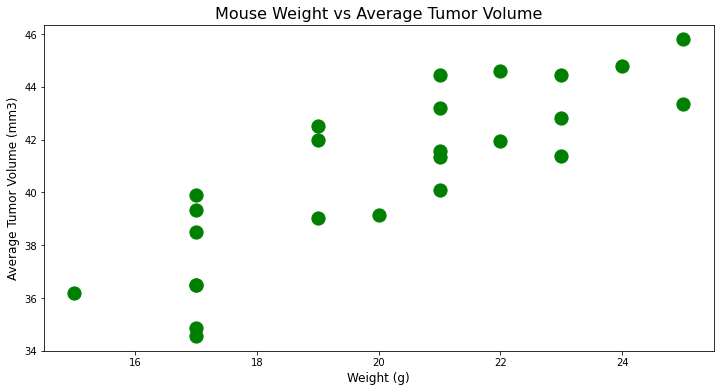

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(12, 6))
avg_capomulin_vol = capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capomulin_vol['Weight (g)'],avg_capomulin_vol['Tumor Volume (mm3)'], s=175, color="green")
plt.title('Mouse Weight vs Average Tumor Volume',fontsize=16)
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =12)

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(avg_capomulin_vol['Weight (g)'], avg_capomulin_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")


The correlation between mouse weight and average tumor volume is 0.84


The r-squared is: 0.709


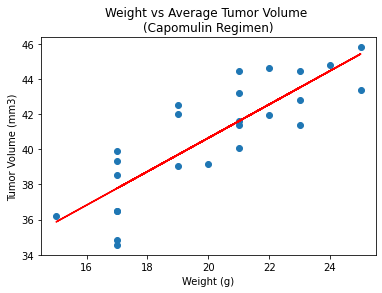

In [27]:
x_values = avg_capomulin_vol['Weight (g)']
y_values = avg_capomulin_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title('Weight vs Average Tumor Volume \n(Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')


print(f"The r-squared is: {round(rvalue**2,3)}")
plt.savefig('linear_regression')
plt.show()